# LightGBM training
This is an auto-generated notebook. To reproduce these results, attach this notebook to the **ML** cluster and rerun it.
- Compare trials in the [MLflow experiment](#mlflow/experiments/2306030850866054/s?orderByKey=metrics.%60val_f1_score%60&orderByAsc=false)
- Navigate to the parent notebook [here](#notebook/2306030850866053) (If you launched the AutoML experiment using the Experiments UI, this link isn't very useful.)
- Clone this notebook into your project folder by selecting **File > Clone** in the notebook toolbar.

Runtime Version: _8.4.x-cpu-ml-scala2.12_

In [0]:
import mlflow

# Use MLflow to track experiments
mlflow.set_experiment("/Users/jcharley@microsoft.com/databricks_automl/EmployeeTargeted_training_dataset_numeric-2021_08_03-10_57")

target_col = "EmployeeTargeted"

## Load Data

In [0]:
import os
import uuid
import shutil
import pandas as pd

from mlflow.tracking import MlflowClient

# Create temp directory to download input data from MLflow
input_temp_dir = os.path.join(os.environ["SPARK_LOCAL_DIRS"], str(uuid.uuid4())[:8])
os.makedirs(input_temp_dir)

# Download the artifact and read it into a pandas DataFrame
input_client = MlflowClient()
input_data_path = input_client.download_artifacts("1e84ba7bc5cd47c087e2c0cee9d95c7b", "data", input_temp_dir)
df_loaded = pd.read_parquet(os.path.join(input_data_path, "training_data"))

# Delete the temp data
shutil.rmtree(input_temp_dir)

# Preview data
df_loaded.head(5)

,Access_Level,Training_Completed,Code_postal,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,peerUsageMetric6,usageMetric2,usageMetric5,fraudTraining
0,4,1.0,10000,1,0,2.0,1,6,0,4,1
1,2,1.0,84995,0,0,1.0,0,5,1,6,1
2,2,1.0,10000,1,0,0.0,0,0,0,4,1
3,3,0.0,24999,1,1,0.0,2,6,0,6,0
4,2,1.0,24999,1,1,1.0,2,3,1,5,0


## Preprocessors

In [0]:
transformers = []

### Numerical columns

Missing values for numerical columns are imputed with mean for consistency

In [0]:
from sklearn.impute import SimpleImputer

transformers.append(("numerical", SimpleImputer(strategy="mean"), ['Gender', 'Training_Completed', 'fraudTraining', 'Access_Level', 'Code_postal', 'Social_Media', 'behaviorPattern2', 'peerUsageMetric6', 'usageMetric2', 'usageMetric5']))

In [0]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers, remainder="passthrough", sparse_threshold=0)

### Feature standardization
Scale all feature columns to be centered around zero with unit variance.

In [0]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

## Training - Validation Split
Split the input data into training and validation data

In [0]:
from sklearn.model_selection import train_test_split

split_X = df_loaded.drop([target_col], axis=1)
split_y = df_loaded[target_col]

X_train, X_val, y_train, y_val = train_test_split(split_X, split_y, random_state=461383267, stratify=split_y)

## Train classification model
- Log relevant metrics to MLflow to track runs
- All the runs are logged under [this MLflow experiment](#mlflow/experiments/2306030850866054/s?orderByKey=metrics.%60val_f1_score%60&orderByAsc=false)
- Change the model parameters and re-run the training cell to log a different trial to the MLflow experiment
- To view the full list of tunable hyperparameters, check the output of the cell below

In [0]:
from lightgbm import LGBMClassifier

help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(LGBMModel, sklearn.base.ClassifierMixin)
 |  LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)
 |  
 |  LightGBM classifier.
 |  
 |  Method resolution order:
 |      LGBMClassifier
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, X, y, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_metric=None, early_stopping_rounds=None, verbose=True, feature_name='auto', cate

In [0]:
import mlflow
import sklearn
from sklearn import set_config
from sklearn.pipeline import Pipeline

set_config(display='diagram')

lgbmc_classifier = LGBMClassifier(
  colsample_bytree=0.9611237010759474,
  lambda_l1=0.004372023298501812,
  lambda_l2=0.8401647565802417,
  learning_rate=0.9754812011623962,
  max_bin=128,
  min_child_samples=3,
  n_estimators=2419,
  num_leaves=271,
  subsample=0.3064720782092512,
  random_state=461383267,
)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("standardizer", standardizer),
    ("classifier", lgbmc_classifier),
])

model

Pipeline Pipeline(steps=[('preprocessor',
 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
 transformers=[('numerical', SimpleImputer(),
 ['Gender',
 'Training_Completed',
 'fraudTraining',
 'Access_Level',
 'Code_postal',
 'Social_Media',
 'behaviorPattern2',
 'peerUsageMetric6',
 'usageMetric2',
 'usageMetric5'])])),
 ('standardizer', StandardScaler()),
 ('classifier',
 LGBMClassifier(colsample_bytree=0.9611237010759474,
 lambda_l1=0.004372023298501812,
 lambda_l2=0.8401647565802417,
 learning_rate=0.9754812011623962, max_bin=128,
 min_child_samples=3, n_estimators=2419,
 num_leaves=271, random_state=461383267,
 subsample=0.3064720782092512))]) preprocessor: ColumnTransformer ColumnTransformer(remainder='passthrough', sparse_threshold=0,
 transformers=[('numerical', SimpleImputer(),
 ['Gender', 'Training_Completed',
 'fraudTraining', 'Access_Level',
 'Code_postal', 'Social_Media',
 'behaviorPattern2', 'peerUsageMetric6',
 'usageMetric2', 'usageMetric5'])]) numerical ['Gender', 'Training_Completed', 'fraudTraining', 'Access_Level', 'Code_postal', 'Social_Media', 'behaviorPattern2', 'peerUsageMetric6', 'usageMetric2', 'usageMetric5'] SimpleImputer SimpleImputer() StandardScaler StandardScaler() LGBMClassifier LGBMClassifier(colsample_bytree=0.9611237010759474,
 lambda_l1=0.004372023298501812, lambda_l2=0.8401647565802417,
 learning_rate=0.9754812011623962, max_bin=128,
 min_child_samples=3, n_estimators=2419, num_leaves=271,
 random_state=461383267, subsample=0.3064720782092512)

In [0]:
# Enable automatic logging of input samples, metrics, parameters, and models
mlflow.sklearn.autolog(log_input_examples=True, silent=True)

with mlflow.start_run(run_name="lightgbm") as mlflow_run:
    model.fit(X_train, y_train)
    
    # Training metrics are logged by MLflow autologging
    # Log metrics for the validation set
    lgbmc_val_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_val, y_val,
                                                                prefix="val_")
    display(pd.DataFrame(lgbmc_val_metrics, index=[0]))

[LightGBM] [Warning] lambda_l1 is set=0.004372023298501812, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004372023298501812
[LightGBM] [Warning] lambda_l2 is set=0.8401647565802417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8401647565802417


,val_precision_score,val_recall_score,val_f1_score,val_accuracy_score,val_log_loss,val_roc_auc_score,val_score
0,0.883565,0.885333,0.884159,0.885333,0.794343,0.888613,0.885333


In [0]:
# Patch requisite packages to the model environment YAML for model serving
import os
import shutil
import uuid
import yaml

None

import lightgbm
from mlflow.tracking import MlflowClient

lgbmc_temp_dir = os.path.join(os.environ["SPARK_LOCAL_DIRS"], str(uuid.uuid4())[:8])
os.makedirs(lgbmc_temp_dir)
lgbmc_client = MlflowClient()
lgbmc_model_env_path = lgbmc_client.download_artifacts(mlflow_run.info.run_id, "model/conda.yaml", lgbmc_temp_dir)
lgbmc_model_env_str = open(lgbmc_model_env_path)
lgbmc_parsed_model_env_str = yaml.load(lgbmc_model_env_str, Loader=yaml.FullLoader)

lgbmc_parsed_model_env_str["dependencies"][-1]["pip"].append(f"lightgbm=={lightgbm.__version__}")

with open(lgbmc_model_env_path, "w") as f:
  f.write(yaml.dump(lgbmc_parsed_model_env_str))
lgbmc_client.log_artifact(run_id=mlflow_run.info.run_id, local_path=lgbmc_model_env_path, artifact_path="model")
shutil.rmtree(lgbmc_temp_dir)

## Feature importance

SHAP is a game-theoretic approach to explain machine learning models, providing a summary plot
of the relationship between features and model output. Features are ranked in descending order of
importance, and impact/color describe the correlation between the feature and the target variable.
- To reduce the computational overhead of each trial, a single example is sampled from the validation set to explain.<br />
  For more thorough results, increase the sample size of explanations, or provide your own examples to explain.
- SHAP cannot explain models using data with nulls; if your dataset has any, both the background data and
  examples to explain will be imputed using the mode (most frequent values). This affects the computed
  SHAP values, as the imputed samples may not match the actual data distribution.

For more information on how to read Shapley values, see the [SHAP documentation](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html).

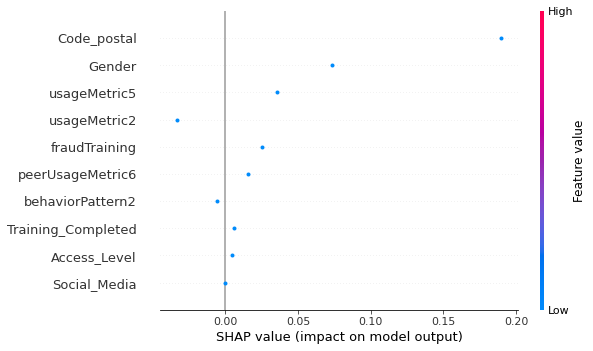

In [0]:
from shap import KernelExplainer, summary_plot

try:
    # SHAP cannot explain models using data with nulls.
    # To enable SHAP to succeed, both the background data and examples to explain are imputed with the mode (most frequent values).
    mode = X_train.mode().iloc[0]

    # Sample background data for SHAP Explainer. Increase the sample size to reduce variance.
    train_sample = X_train.sample(n=min(100, len(X_train.index))).fillna(mode)

    # Sample a single example from the validation set to explain. Increase the sample size and rerun for more thorough results.
    example = X_val.sample(n=1).fillna(mode)

    # Use Kernel SHAP to explain feature importance on the example from the validation set.
    predict = lambda x: model.predict(pd.DataFrame(x, columns=X_train.columns))
    explainer = KernelExplainer(predict, train_sample, link="identity")
    shap_values = explainer.shap_values(example, l1_reg=False)
    summary_plot(shap_values, example)
except Exception as e:
    print(f"An unexpected error occurred while plotting feature importance using SHAP: {e}")

## Inference
[The MLflow Model Registry](https://docs.databricks.com/applications/mlflow/model-registry.html) is a collaborative hub where teams can share ML models, work together from experimentation to online testing and production, integrate with approval and governance workflows, and monitor ML deployments and their performance. The snippets below show how to add the model trained in this notebook to the model registry and to retrieve it later for inference.

> **NOTE:** The `model_uri` for the model already trained in this notebook can be found in the cell below

### Register to Model Registry
```
model_name = "Example"

model_uri = f"runs:/{ mlflow_run.info.run_id }/model"
registered_model_version = mlflow.register_model(model_uri, model_name)
```

### Load from Model Registry
```
model_name = "Example"
model_version = registered_model_version.version

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")
model.predict(input_X)
```

### Load model without registering
```
model_uri = f"runs:/{ mlflow_run.info.run_id }/model"

model = mlflow.pyfunc.load_model(model_uri)
model.predict(input_X)
```

In [0]:
# model_uri for the generated model
print(f"runs:/{ mlflow_run.info.run_id }/model")

runs:/09333ac0f251468ebd7929139c2085ad/model
